In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, ZeroPadding2D
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from sklearn.model_selection import train_test_split
import os
from PIL import Image

In [2]:
# # Меняем разрешение изображений 
# path_Bike='/Users/Julaysa/Desktop/Bike/'
# with os.scandir(path=path_Bike) as it:
#     for entry in it:
#             #print("file:\t" + entry.name) #имя файлов 
#             img_obj = Image.open(path_Bike + entry.name)
#             img_obj = img_obj.resize((150, 200)) # Размер изображений пиксели 
#             img_obj.save(path_Bike + entry.name)

# path_Car='/Users/Julaysa/Desktop/Car/'
# with os.scandir(path=path_Car) as it:
#     for entry in it:
#             #print("file:\t" + entry.name) #имя файлов 
#             img_obj = Image.open(path_Car + entry.name)
#             img_obj = img_obj.resize((150, 200)) # Размер изображений пиксели 
#             img_obj.save(path_Car + entry.name)

In [3]:
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        loadedImages.append(plt.imread(path + image))
    return np.array(loadedImages)

In [4]:
Bike = loadImages("/Users/Julaysa/Desktop/Bike/")
Car = loadImages("/Users/Julaysa/Desktop/Car/")

In [5]:
Bike=Bike/255
Car=Car/255

In [6]:
photo = np.concatenate((Bike, Car), axis=0)
label_first = np.concatenate((np.zeros(50), np.ones(50)), axis=0)
label_second = np.concatenate((np.ones(50), np.zeros(50)), axis=0)
label_almost = np.vstack((label_first, label_second))
label = label_almost.swapaxes(1,0)
photo.shape

(100, 200, 150, 3)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(photo, label, test_size=0.1, random_state=42)

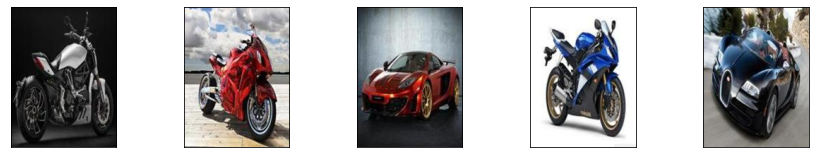

In [8]:
plt.figure(figsize=(15,15))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [9]:
a=[]
for i in range(5):
    if  y_train[i][0]>0.5:
        a.append("Car")
    else:
        a.append("Bike")
a

['Bike', 'Bike', 'Car', 'Bike', 'Car']

In [10]:
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, kernel_size=(3, 3),padding='same',activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(2, activation='softmax'))

In [11]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train,
          epochs=25,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/25
3/3 [==============================] - 16s 4s/step - loss: 2.7288 - accuracy: 0.5111 - val_loss: 1.3561 - val_accuracy: 0.4000
Epoch 2/25
3/3 [==============================] - 13s 4s/step - loss: 1.3168 - accuracy: 0.6222 - val_loss: 0.6763 - val_accuracy: 0.6000
Epoch 3/25
3/3 [==============================] - 12s 4s/step - loss: 0.6677 - accuracy: 0.7111 - val_loss: 0.6669 - val_accuracy: 0.7000
Epoch 4/25
3/3 [==============================] - 11s 4s/step - loss: 0.6462 - accuracy: 0.6778 - val_loss: 0.6317 - val_accuracy: 0.7000
Epoch 5/25
3/3 [==============================] - 11s 4s/step - loss: 0.6100 - accuracy: 0.6000 - val_loss: 0.6016 - val_accuracy: 0.8000
Epoch 6/25
3/3 [==============================] - 11s 4s/step - loss: 0.5060 - accuracy: 0.9000 - val_loss: 0.5537 - val_accuracy: 0.8000
Epoch 7/25
3/3 [==============================] - 11s 4s/step - loss: 0.3966 - accuracy: 0.8222 - val_loss: 0.6572 - val_accuracy: 0.6000
Epoch 8/25
3/3 [==================

KeyboardInterrupt: 

# Прогноз модели

In [13]:
# path_p='/Users/Julaysa/Desktop/Predict_b_c/'
# with os.scandir(path=path_p) as it:
#     for entry in it:
#             #print("file:\t" + entry.name) #имя файлов 
#             img_obj = Image.open(path_p + entry.name)
#             img_obj = img_obj.resize((150, 200)) # Размер изображений пиксели 
#             img_obj.save(path_p + entry.name)


x_new = loadImages("/Users/Julaysa/Desktop/Predict_b_c/")
x_new=x_new/255


In [14]:
pred=model.predict(x_new)

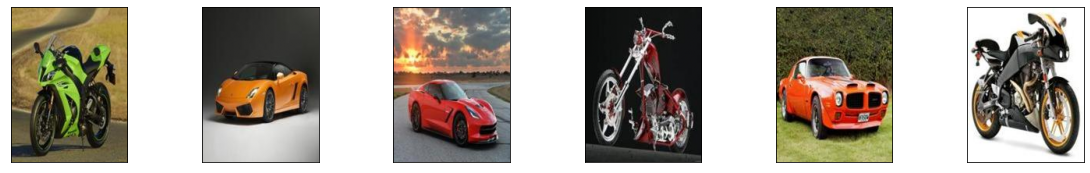

In [15]:
plt.figure(figsize=(20,20))
for i in range(6):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_new[i], cmap=plt.cm.binary)
plt.show()

In [16]:
b=[]
for i in range(6):
    if  pred[i][0]>0.5:
        b.append("Car")
    else:
        b.append("Bike")
b

['Bike', 'Car', 'Car', 'Bike', 'Car', 'Bike']